In [3]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
img = image.load_img('C:/Users/ADMIN/Desktop/python jupyter/Deep Learning/train/dog.jpg',target_size=(200,200))

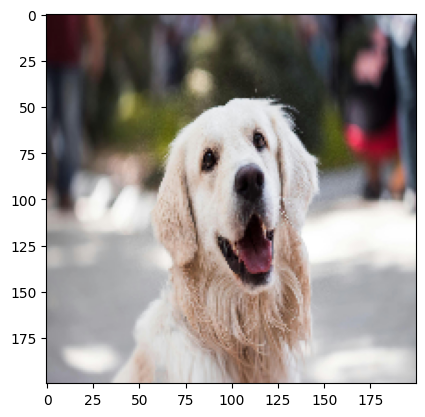

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [19]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'reflect'
)

In [20]:
img = image.img_to_array(img)

In [21]:
img.shape

(200, 200, 3)

In [22]:
input_batch = img.reshape(1,200,200,3)

In [23]:
i = 0
for output in datagen.flow(input_batch,batch_size=1,save_to_dir='aug'):
    i = i + 1
    if i == 10:
        break

In [24]:
input_batch.shape

(1, 200, 200, 3)

# on dog vs cats dataset without augmentation

In [28]:
import cv2
import os
import random
import numpy as np

In [29]:
mydir = r'C:\Users\ADMIN\Desktop\python jupyter\Deep Learning\data\train'

In [30]:
categories = ['cats','dogs']

In [33]:
data = []
for i in categories:
    folder_path = os.path.join(mydir,i)
    if i == 'cats':
        label = 0
    else:
        label = 1

    for j in os.listdir(folder_path):
        img_path = os.path.join(folder_path,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(150,150))
        data.append([img,label])

In [34]:
random.shuffle(data)

In [35]:
X = []
Y = []

for i in data:
    X.append(i[0])
    Y.append(i[1])

In [36]:
Y = np.array(Y)
X = np.array(X)

In [37]:
X.shape

(557, 150, 150, 3)

In [38]:
X = X/255

In [40]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout

In [43]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [46]:
model.fit(X,Y,epochs=5,validation_split=0.1)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.6173 - loss: 0.6818 - val_accuracy: 0.6250 - val_loss: 0.6590
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.6138 - loss: 0.6688 - val_accuracy: 0.4821 - val_loss: 1.1268
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.5915 - loss: 0.7437 - val_accuracy: 0.5893 - val_loss: 0.6418
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 347ms/step - accuracy: 0.6813 - loss: 0.6404 - val_accuracy: 0.5179 - val_loss: 0.7477
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.6592 - loss: 0.6118 - val_accuracy: 0.6429 - val_loss: 0.6766


# using data augmentation 

In [48]:
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150,150),
    batch_size = batch_size,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    'data/valid',
    target_size=(150,150),
    batch_size = batch_size,
    class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 557 images belonging to 2 classes.


In [52]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [55]:
model.fit(train_generator, 
          steps_per_epoch=2000 // batch_size, 
          epochs=25, 
          validation_data=validation_generator, 
          validation_steps=800 // batch_size)

Epoch 1/25


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 35/125 ━━━━━━━━━━━━━━━━━━━━ 1:25 949ms/step - accuracy: 0.5077 - loss: 0.7346

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


125/125 ━━━━━━━━━━━━━━━━━━━━ 108s 562ms/step - accuracy: 0.4886 - loss: 0.7195 - val_accuracy: 0.5458 - val_loss: 0.6921
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - accuracy: 0.5202 - loss: 0.7125 - val_accuracy: 0.6230 - val_loss: 0.6905
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 308ms/step - accuracy: 0.5303 - loss: 0.6953 - val_accuracy: 0.5350 - val_loss: 0.6899
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 356ms/step - accuracy: 0.5901 - loss: 0.7069 - val_accuracy: 0.6679 - val_loss: 0.6637
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - accuracy: 0.5980 - loss: 0.6814 - val_accuracy: 0.6966 - val_loss: 0.6442
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 187ms/step - accuracy: 0.6259 - loss: 0.6629 - val_accuracy: 0.4991 - val_loss: 0.8035
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.6596 - loss: 0.6532 - val_accuracy: 0.6679 - val_loss: 0.6037
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - accuracy: 0.6542 - loss: 0.6270 - va